loss最小的迭代次数： 1045
loss最小值： 13.2296928737


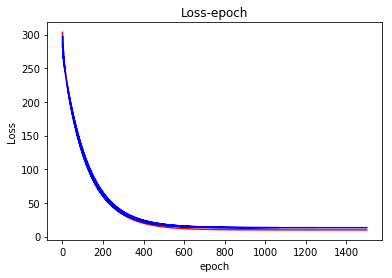

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split 
x,y = load_svmlight_file("E:/housing_scale.txt")
x=x.toarray()
m, n = np.shape(x)
a=np.ones((m))
X=np.column_stack((x,a))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)
m_train,n_train= np.shape(X_train)
m_test,n_test= np.shape(X_test)
w = np.zeros(n+1)
W=w.transpose()
η = 0.41
epoch =1500
Iteration=range(0,epoch+1)
Ltrain=[]
Lvalidation=[]
for i in range(0, epoch+1):
    hypothesis = np.dot(X_train,W)
    loss_train = hypothesis - y_train
    Ltrain.append(np.dot(loss_train.transpose(),loss_train)/(2*m_train))  
    y_predict=np.dot(X_test,W)
    loss_test= y_predict-y_test
    Lvalidation.append(np.dot(loss_test.transpose(),loss_test)/(2*m_test))  
    gradient = np.dot(X_train.transpose(),loss_train) /m_train
    W = W - η * gradient
print("loss最小的迭代次数：",Lvalidation.index(min(Lvalidation)))
print("loss最小值：",min(Lvalidation))
plt.plot(Iteration,Ltrain,'r',label='Ltrain') 
plt.plot(Iteration, Lvalidation,'b',label=' Lvalidation') 
plt.title("Loss-epoch")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()